# Modelos de clasificación

**Autor/es:**
+ Cristobal Betancurt Palma
+ Jonathan Olivares Garces

**Correos Electrónicos:**
+ Cristobal.betancurt2101@alumnos.ubiobio.cl
+ Jonathan.olivares2101@alumnos.ubiobio.cl

**Fecha de Creación:** Octubre de 2024  
**Versión:** 1.0

---

## Descripción

Este notebook contiene el desarrollo de la evaluación 2 - parte 1 de la asignatura de Inteligencia Artificial de la carrera de Ingeniería civil en informática de la Universidad del Bío Bío - Sede Concepción

# Carga de datos

In [ ]:
# Descargar el archivo
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/empleados.csv.zip

# Descomprimir el archivo
!unzip -q empleados.csv.zip

# Eliminar el archivo zip
!rm empleados.csv.zip

# Eliminar la carpeta __MACOSX si se creó
!rm -rf __MACOSX

## IMPORTACIONES

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, mean_squared_error
from sklearn.tree import plot_tree


import warnings
warnings.filterwarnings('ignore')

# Carga de data

In [3]:
data = pd.read_csv('empleados.csv')
data.shape

(74498, 24)

# Metodología CRISP-DM

## Fase 2 - Comprensión de los datos

In [11]:
# Nombre de las columnas
data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [4]:
# Obtiene las primeras 5 observaciones
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [6]:
# Obtiene detalles de las columnas 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents  

In [48]:
# Variables cualitiativas categoricas   
data.select_dtypes(include=['int64']).nunique()


Employee ID             74498
Age                        42
Years at Company           51
Monthly Income           9842
Number of Promotions        5
Distance from Home         99
Number of Dependents        7
Company Tenure            127
dtype: int64

In [47]:
# Variables cualitiativas categoricas   
data.select_dtypes(include=['object']).nunique()


Gender                      2
Job Role                    5
Work-Life Balance           4
Job Satisfaction            4
Performance Rating          4
Overtime                    2
Education Level             5
Marital Status              3
Job Level                   3
Company Size                3
Remote Work                 2
Leadership Opportunities    2
Innovation Opportunities    2
Company Reputation          4
Employee Recognition        4
Attrition                   2
dtype: int64

---
$\textbf{COMENTARIO}$

----
Tenemos 8 variables cuantitativas y 16 cualitativas

In [7]:
# Obtiene la cantidad de regostros con valores nulos
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [8]:
# Usaremos un método resumen de estadísticas numéricas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Employee ID,74498.0,37249.500000,21505.864514,1.0,18625.25,37249.5,55873.75,74498.0
Age,74498.0,38.529746,12.083456,18.0,28.00,39.0,49.00,59.0
Years at Company,74498.0,15.721603,11.223744,1.0,7.00,13.0,23.00,51.0
Monthly Income,74498.0,7299.379514,2152.508566,1226.0,5652.00,7348.0,8876.00,16149.0
Number of Promotions,74498.0,0.832935,0.995289,0.0,0.00,1.0,2.00,4.0
Distance from Home,74498.0,49.991584,28.513611,1.0,25.00,50.0,75.00,99.0
Number of Dependents,74498.0,1.650326,1.553633,0.0,0.00,1.0,3.00,6.0
Company Tenure,74498.0,55.727456,25.399349,2.0,36.00,56.0,76.00,128.0


In [15]:
data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [75]:
# Se crea una copia del dataset
df = data

---
$\textbf{Tratamiento de Variables Categoricas}$

----

In [79]:
# Variables cualitiativas categoricas   
df.select_dtypes(include=['object']).nunique()


Gender                      2
Job Role                    5
Work-Life Balance           4
Job Satisfaction            4
Performance Rating          4
Overtime                    2
Education Level             5
Marital Status              3
Job Level                   3
Company Size                3
Remote Work                 2
Leadership Opportunities    2
Innovation Opportunities    2
Company Reputation          4
Employee Recognition        4
Attrition                   2
dtype: int64

In [78]:
df.groupby("Gender").size()

Gender
Female    33672
Male      40826
dtype: int64

In [80]:
df.Gender.replace({"Female":2, "Male":1}, inplace=True)
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,2,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,2,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,2,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,1,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [56]:
data.groupby("Job Role").size()

Job Role
Education     15658
Finance       10448
Healthcare    17074
Media         11996
Technology    19322
dtype: int64

In [85]:
df["Job Role"].replace({"Education": 5, "Finance": 4, "Healthcare": 3, "Media": 2, "Technology": 1}, inplace=True)
df.head()


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,5,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,2,4,2,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,2,10,3,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,2,7,5,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,1,41,5,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [58]:
data.groupby("Work-Life Balance").size()

Work-Life Balance
Excellent    13432
Fair         22529
Good         28158
Poor         10379
dtype: int64

In [86]:
df["Work-Life Balance"].replace({"Excellent":4, "Fair":3,"Good":2, "Poor":1}, inplace=True)
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,5,5390,4,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,2,4,2,5534,1,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,2,10,3,8159,2,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,2,7,5,3989,2,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,1,41,5,4821,3,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [59]:
data.groupby("Job Satisfaction").size()

Job Satisfaction
High         37245
Low           7457
Medium       14717
Very High    15079
dtype: int64

In [87]:
df["Job Satisfaction"].replace({"High":4, "Low":3,"Medium":2,"Very High":1}, inplace=True)
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,5,5390,4,2,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,2,4,2,5534,1,4,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,2,10,3,8159,2,4,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,2,7,5,3989,2,4,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,1,41,5,4821,3,1,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [60]:
data.groupby("Performance Rating").size()

Performance Rating
Average          44719
Below Average    11139
High             14910
Low               3730
dtype: int64

In [92]:
df["Performance Rating"].replace({"Average":4, "Below Average":3,"High":2,"Low":1,}, inplace=True)
df.groupby("Performance Rating").size()

Performance Rating
1     3730
2    14910
3    11139
4    44719
dtype: int64

In [63]:
data.groupby("Overtime").size()

Overtime
No     50157
Yes    24341
dtype: int64

In [93]:
df["Overtime"].replace({"No":2,"Yes":1,}, inplace=True)
df.groupby("Overtime").size()

Overtime
1    24341
2    50157
dtype: int64

In [64]:
data.groupby("Education Level").size()

Education Level
Associate Degree     18649
Bachelor’s Degree    22331
High School          14680
Master’s Degree      15021
PhD                   3817
dtype: int64

In [96]:
df["Education Level"].replace({"Associate Degree":5,"Bachelor’s Degree":4, "High School":3,"Master’s Degree":2,"PhD":1,}, inplace=True)
df.groupby("Education Level").size()

Education Level
1     3817
2    15021
3    14680
4    22331
5    18649
dtype: int64

In [65]:
data.groupby("Marital Status").size()

Marital Status
Divorced    11078
Married     37419
Single      26001
dtype: int64

In [98]:
df["Marital Status"].replace({"Divorced":3,"Married":2,"Single":1}, inplace=True)
df.groupby("Marital Status").size()

Marital Status
1    26001
2    37419
3    11078
dtype: int64

In [66]:
data.groupby("Job Level").size()

Job Level
Entry     29780
Mid       29678
Senior    15040
dtype: int64

In [99]:
df["Job Level"].replace({"Entry":3,"Mid":2,"Senior":1}, inplace=True)
df.groupby("Job Level").size()

Job Level
1    15040
2    29678
3    29780
dtype: int64

In [67]:
data.groupby("Company Size").size()

Company Size
Large     14912
Medium    37231
Small     22355
dtype: int64

In [100]:
df["Company Size"].replace({"Large":3,"Medium":2,"Small":1}, inplace=True)
df.groupby("Company Size").size()

Company Size
1    22355
2    37231
3    14912
dtype: int64

In [68]:
data.groupby("Remote Work").size()

Remote Work
No     60300
Yes    14198
dtype: int64

In [102]:
df["Remote Work"].replace({"No":2,"Yes":1}, inplace=True)
df.groupby("Remote Work").size()

Remote Work
1    14198
2    60300
dtype: int64

In [69]:
data.groupby("Leadership Opportunities").size()

Leadership Opportunities
No     70845
Yes     3653
dtype: int64

In [103]:
df["Leadership Opportunities"].replace({"No":2,"Yes":1}, inplace=True)
df.groupby("Leadership Opportunities").size()

Leadership Opportunities
1     3653
2    70845
dtype: int64

In [70]:
data.groupby("Innovation Opportunities").size()

Innovation Opportunities
No     62394
Yes    12104
dtype: int64

In [104]:
df["Innovation Opportunities"].replace({"No":2,"Yes":1}, inplace=True)
df.groupby("Innovation Opportunities").size()

Innovation Opportunities
1    12104
2    62394
dtype: int64

In [71]:
data.groupby("Company Reputation").size()

Company Reputation
Excellent     7414
Fair         14786
Good         37182
Poor         15116
dtype: int64

In [105]:
df["Company Reputation"].replace({"Excellent":4,"Fair":3,"Good":2,"Poor":1}, inplace=True)
df.groupby("Company Reputation").size()

Company Reputation
1    15116
2    37182
3    14786
4     7414
dtype: int64

In [72]:
data.groupby("Employee Recognition").size()

Employee Recognition
High         18550
Low          29620
Medium       22657
Very High     3671
dtype: int64

In [106]:
df["Employee Recognition"].replace({"Very High":4,"High":3,"Low":2,"Medium":1}, inplace=True)
df.groupby("Employee Recognition").size()

Employee Recognition
1    22657
2    29620
3    18550
4     3671
dtype: int64

In [20]:
data.groupby("Attrition").size()

Attrition
Left      35370
Stayed    39128
dtype: int64

In [107]:
df["Attrition"].replace({"Left":2,"Stayed":1}, inplace=True)
df.groupby("Attrition").size()

Attrition
1    39128
2    35370
dtype: int64

In [111]:
# Variables cualitiativas categoricas   
data.select_dtypes(include=['int64']).nunique()


Employee ID                 74498
Age                            42
Gender                          2
Years at Company               51
Job Role                        5
Monthly Income               9842
Work-Life Balance               4
Job Satisfaction                4
Performance Rating              4
Number of Promotions            5
Overtime                        2
Distance from Home             99
Education Level                 5
Marital Status                  3
Number of Dependents            7
Job Level                       3
Company Size                    3
Company Tenure                127
Remote Work                     2
Leadership Opportunities        2
Innovation Opportunities        2
Company Reputation              4
Employee Recognition            4
Attrition                       2
dtype: int64

---

$\textbf{COMENTARIO}$

----


Ya no quedan variables que no sean cuantitavias por lo que se podrian realizar los mapas de calor

---

$\textbf{Graficos}$

----

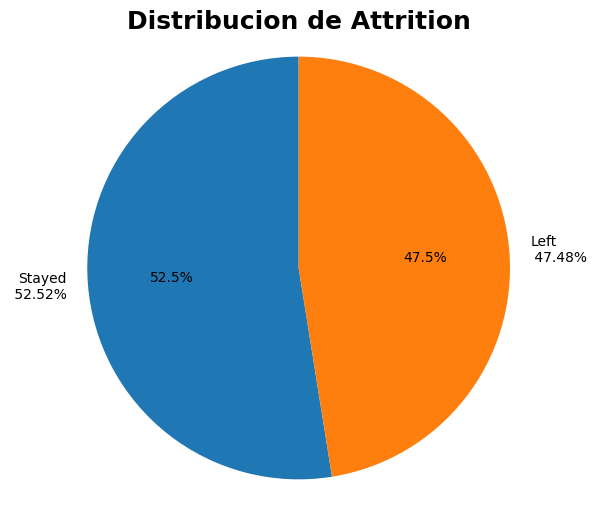

In [125]:

# Asegúrate de trabajar con los valores numéricos actualizados
clases = np.array([data[data.Attrition == 1].shape[0],  # Stayed
                   data[data.Attrition == 2].shape[0]]) # Left

# Validamos que no haya valores NaN o 0 en las clases
if np.any(np.isnan(clases)) or np.sum(clases) == 0:
    print("Error: Hay valores NaN o las clases están vacías.")
else:
    # Creando las leyendas del gráfico.
    labels = [str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%' for x in clases]
    labels[0] = 'Stayed\n ' + labels[0]
    labels[1] = 'Left\n ' + labels[1]

    # Crear el gráfico de torta
    plt.figure(figsize=(6, 6))
    plt.pie(clases, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title('Distribucion de Attrition', fontsize=18, fontweight="bold")
    plt.axis('equal')  # Para que el gráfico de torta sea un círculo
    plt.show()


---
$\textbf{COMENTARIO}$

----
La distribucion es mas o menos simetrica 

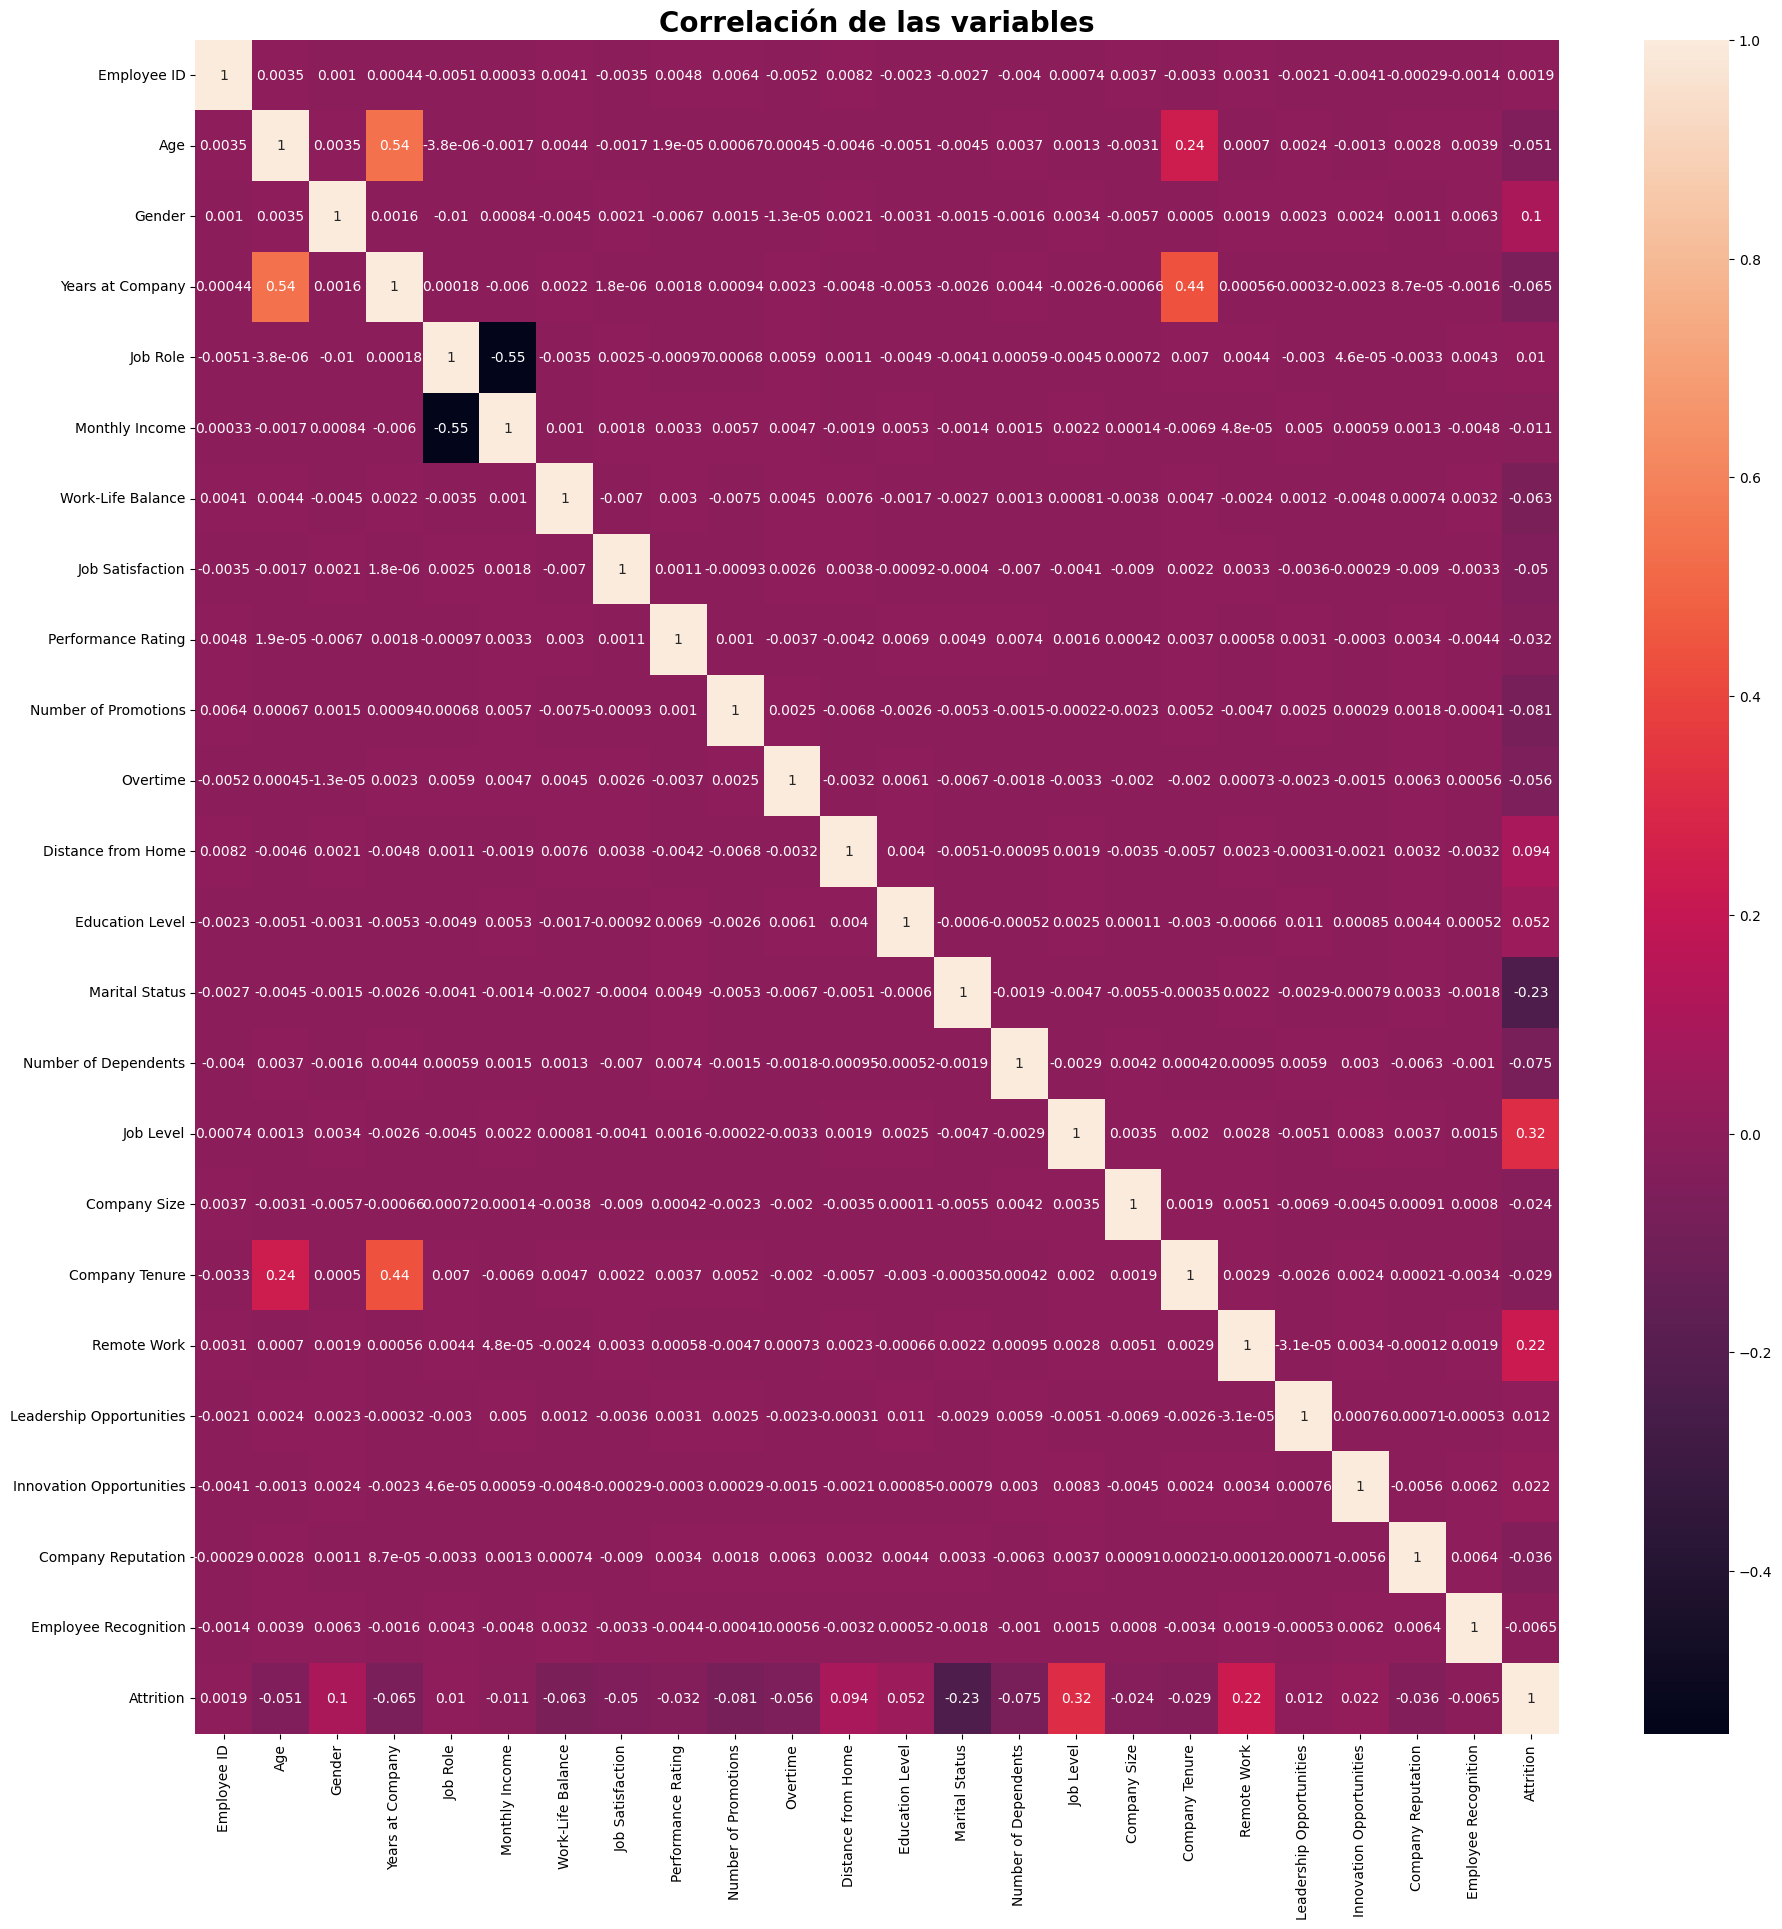

In [131]:
plt.figure(figsize=(22,22))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlación de las variables", fontsize=20, fontweight="bold")
plt.show()

---
$\textbf{Analisis}$

----

Comentarios acerca de la matriz:

+ 15 de 24 Variables presentan una correlacion negativa con la variable objetivo
+ 9 de 24 Variables presentan una correlacion Positiva con la variable objetivo

In [175]:
# Suponiendo que 'target' es el nombre de la variable objetivo
variable_objetivo = 'Attrition'

# Calcular la correlación de todas las variables con la variable objetivo
correlaciones = df.corr()[variable_objetivo]

# Crear un DataFrame con los resultados de la correlación
df_correlacion = pd.DataFrame(correlaciones).reset_index()
df_correlacion.columns = ['variable', 'correlacion']

# Ordenar los valores de correlación de forma descendente
df_correlacion = df_correlacion.sort_values(by='correlacion', ascending=False)

# Mostrar el DataFrame de correlaciones
print(df_correlacion)

                    variable  correlacion
23                 Attrition     1.000000
15                 Job Level     0.315289
18               Remote Work     0.221191
2                     Gender     0.100637
11        Distance from Home     0.093836
12           Education Level     0.051912
20  Innovation Opportunities     0.021548
19  Leadership Opportunities     0.011995
4                   Job Role     0.010433
0                Employee ID     0.001935
22      Employee Recognition    -0.006460
5             Monthly Income    -0.010687
16              Company Size    -0.024118
17            Company Tenure    -0.028964
8         Performance Rating    -0.032360
21        Company Reputation    -0.036295
7           Job Satisfaction    -0.050305
1                        Age    -0.050801
10                  Overtime    -0.056019
6          Work-Life Balance    -0.063416
3           Years at Company    -0.065388
14      Number of Dependents    -0.074606
9       Number of Promotions    -0

In [176]:
print("Mayor correlacion positiva : ",
    df_correlacion.query("correlacion < 1 and correlacion >= 0.4").index.values)

print("Mayor correlacion negativa : ",
    df_correlacion.query("correlacion <= -0.4").index.values)

# Arma la lista con los nombres de las variables
lst_features = np.append(df_correlacion.query("correlacion < 1 and correlacion >= 0.4").index.values,
    df_correlacion.query("correlacion <= -0.4").index.values)

Mayor correlacion positiva :  []
Mayor correlacion negativa :  []


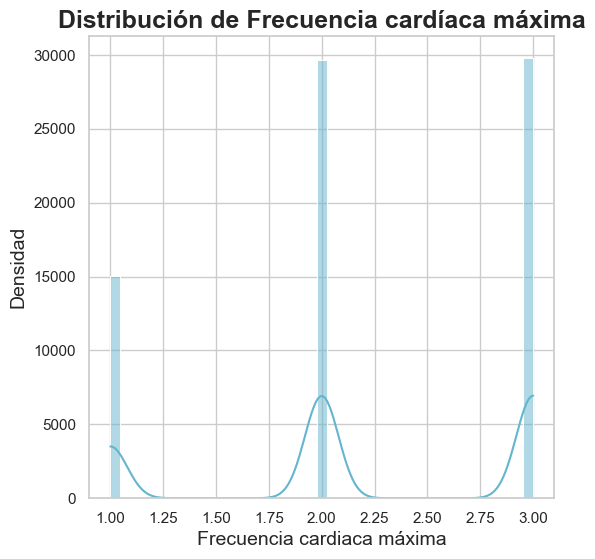

In [178]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(6, 6))
ax = sns.histplot(df['Job Level'], kde = True, color = 'c')
plt.title('Distribución de Frecuencia cardíaca máxima', fontsize = 18, fontweight="bold")
plt.xlabel("Frecuencia cardiaca máxima", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.show()

## Fase 3 - Preparación de datos

In [ ]:
# Escriba su código acá

## Fase 4 - Modelamiento

### Modelos Línea base

+ ***Acá todos los modelos deben tener un accuracy y roc_auc mayor o igual a 0.7***
+ Se deben incluir las métricas: acuracy, precision, recall, f1-score, matriz de confusión y roc_auc

In [ ]:
# Escriba su código acá

### Modelos línea base mejorada

+ ***Acá todos los modelos deben tener un roc_auc mayor o igual a 0.78***
+ Se deben incluir las métricas: acuracy, precision, recall, f1-score, matriz de confusión y roc_auc

In [ ]:
# Escriba su código acá

## Fase 5 - Evaluación

Acá debe seleccionar el mejor modelo de la línea base mejorada usando una métrica que debe justificar

### Selección y justificación de la métrica

Deje acá sus comentarios

In [ ]:
# Escriba su código acá

#### Obtención del mejor modelo usando la métrica seleccionada (recuerde que el roc_auc debe ser mayor a 0.78

In [ ]:
# Escriba su código acá

#### Interpretación de todas las métricas del mejor modelo seleccionado

## Fase 6 - Deployment

In [ ]:
# Escriba su código acá

# Pregunta

¿Recomendarían el modelo seleccionado?

Si la respuesta a la pregunta anterior es afirmativa: ¿Cuál es la razón por la cual lo recomendarían?

Si la respuesta a la pregunta es negativa: ¿Cuál es la alternativa propuesta?